In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from value import Value
from graph import *

In [3]:

a = Value(2, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label='d'
f = Value(data=-2.0, label='f')
L = f * d; L.label = 'L'

In [4]:
d._prev

{Value(data=-6.0 label=e grad=0.0), Value(data=10.0 label=c grad=0.0)}

In [5]:
d._op

'+'

In [6]:
nodes, edges = trace(d)
nodes

{Value(data=-3.0 label=b grad=0.0),
 Value(data=-6.0 label=e grad=0.0),
 Value(data=10.0 label=c grad=0.0),
 Value(data=2 label=a grad=0.0),
 Value(data=4.0 label=d grad=0.0)}

In [7]:
edges

{(Value(data=-3.0 label=b grad=0.0), Value(data=-6.0 label=e grad=0.0)),
 (Value(data=-6.0 label=e grad=0.0), Value(data=4.0 label=d grad=0.0)),
 (Value(data=10.0 label=c grad=0.0), Value(data=4.0 label=d grad=0.0)),
 (Value(data=2 label=a grad=0.0), Value(data=-6.0 label=e grad=0.0))}

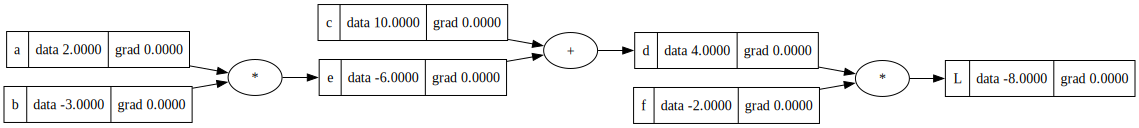

In [8]:
draw_dot(L)

In [9]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b 
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
#---
o = n.tanh(); 
#--
o.label = 'o'


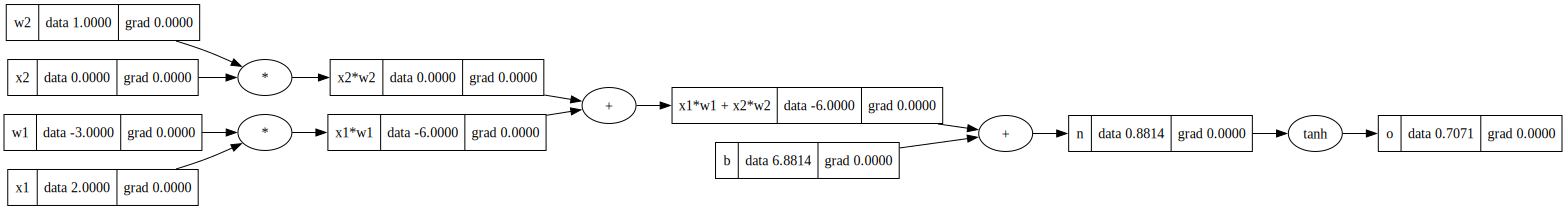

In [10]:
draw_dot(o) 

In [11]:
# Topological sort and call backward
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data=6.881373587019543 label=b grad=0.0),
 Value(data=2.0 label=x1 grad=0.0),
 Value(data=-3.0 label=w1 grad=0.0),
 Value(data=-6.0 label=x1*w1 grad=0.0),
 Value(data=1.0 label=w2 grad=0.0),
 Value(data=0.0 label=x2 grad=0.0),
 Value(data=0.0 label=x2*w2 grad=0.0),
 Value(data=-6.0 label=x1*w1 + x2*w2 grad=0.0),
 Value(data=0.8813735870195432 label=n grad=0.0),
 Value(data=0.7071067811865476 label=o grad=0.0)]

In [12]:
for node in reversed(topo):
    node._backward()

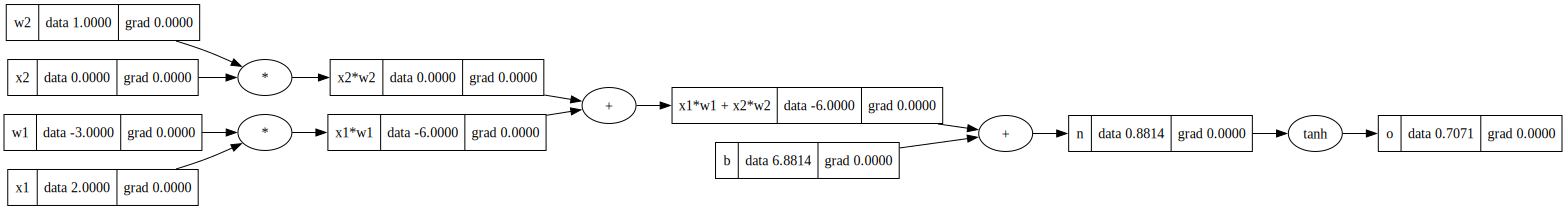

In [13]:
draw_dot(o)

In [14]:
a = Value(2.0)
b = Value(4.0)
b / a

Value(data=2.0 label= grad=0.0)

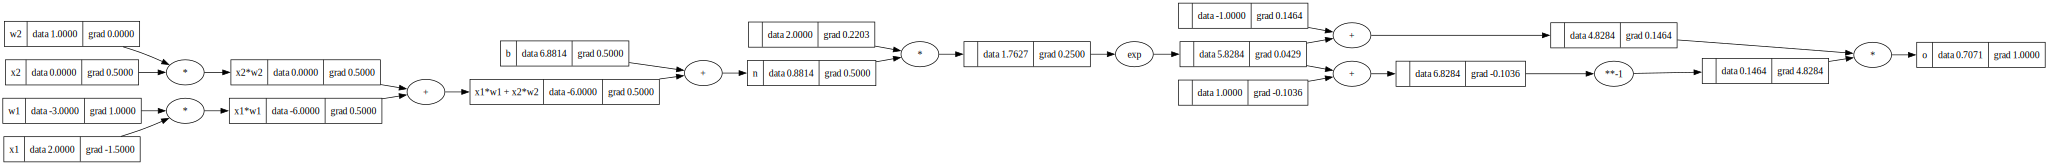

In [18]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b 
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
#---
e = (2*n).exp()
o = (e - 1) / (e + 1)
#--
o.label = 'o'
o.backward()
draw_dot(o)

In [34]:
from neuron import Neuron

x = [2.0, 3.0]
n = Neuron(2)
n(x)

Value(data=0.993236500754431 label= grad=0.0)

In [36]:
from neuron import Layer

x = [2.0, 3.0]
l = Layer(2, 3)
l(x)


[Value(data=-0.904325652814781 label= grad=0.0),
 Value(data=0.9853745598437779 label= grad=0.0),
 Value(data=0.9861124350087708 label= grad=0.0)]

In [114]:
from neuron import MLP
x = [2.0, 3.0, -1.0]
# 3 layers each of size 4, 4, and 1 neuron which each have 3 expressions and value being sum[wixi] for i to len(x) + b then tanH
n = MLP(3, [4, 4, 1])
y = n(x)
y

Value(data=0.9212236719204292 label= grad=0.0)

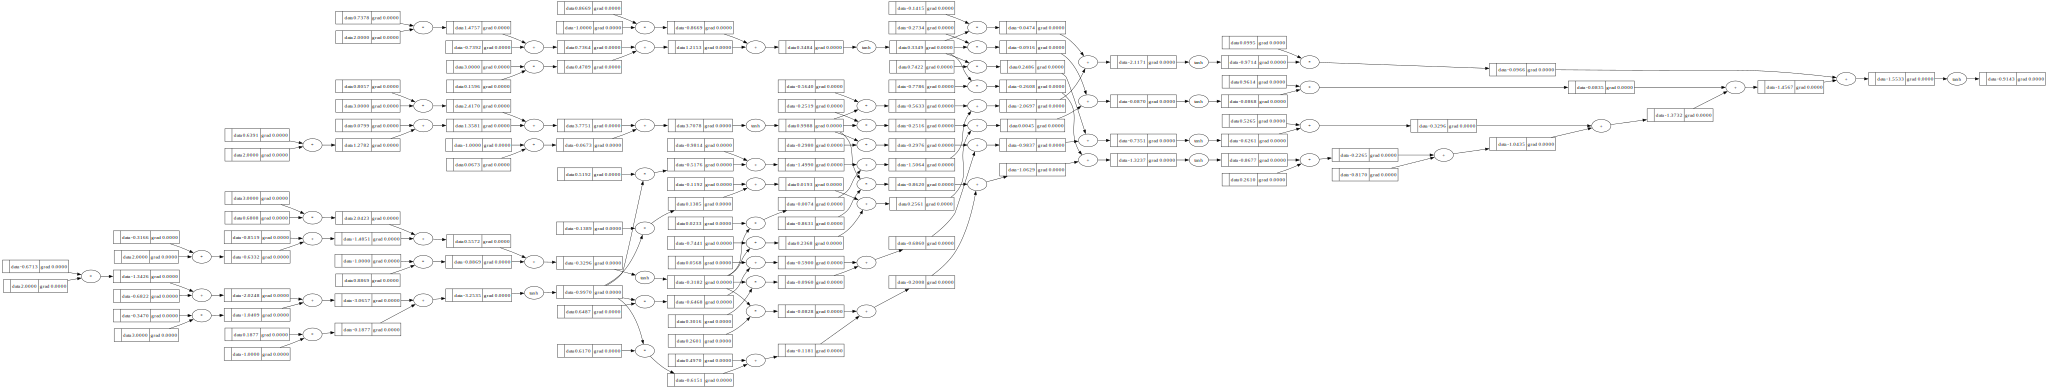

In [79]:
draw_dot(y)

In [115]:
# multiple inputs to the MLP
x_inputs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

# Ideal outputs per input
y_ideals = [1.0, -1.0, -1.0, 1.0] 

# Actual outputs
y_outputs = [n(x) for x in x_inputs]
y_outputs

[Value(data=0.9212236719204292 label= grad=0.0),
 Value(data=0.33287631528849804 label= grad=0.0),
 Value(data=0.5908636131688542 label= grad=0.0),
 Value(data=0.777738892984974 label= grad=0.0)]

In [116]:
# mean squared loss per output, higher the diff higher the loss
# total loss = sum of all mean squared loss
# overall goal to reduce loss
# low loss = closest to ideal output
loss = sum((y_o - y_ideal)**2 for y_ideal, y_o in zip(y_ideals, y_outputs))
loss

Value(data=4.363012017118951 label= grad=0.0)

In [82]:
# Backward propogation from loss to all neurons to find out how we can change parameters to reduce loss. Beautiful
loss.backward()

In [117]:
n.layers[0].neurons[0].w[0].grad

0.0

In [86]:
n.parameters()

[Value(data=-0.6713068854280513 label= grad=-0.007216518667458319),
 Value(data=-0.346965657114662 label= grad=-0.011309956706250226),
 Value(data=0.18773765505019457 label= grad=0.012036890038694029),
 Value(data=-0.6822117855763119 label= grad=-0.00833635625967378),
 Value(data=-0.31657803984785393 label= grad=0.7997989392876002),
 Value(data=0.6807725019889501 label= grad=1.1539521207692618),
 Value(data=0.8868651022233656 label= grad=-0.4821397582835266),
 Value(data=-0.8519253942402725 label= grad=0.4713995180505186),
 Value(data=0.6391223774700048 label= grad=0.057092078320389116),
 Value(data=0.8056729855500673 label= grad=0.11711155606614979),
 Value(data=0.0673379206084117 label= grad=-0.11062249289325242),
 Value(data=0.07986286859702085 label= grad=0.0859334579434199),
 Value(data=0.7378275356212651 label= grad=0.3261945310184749),
 Value(data=0.15963427138525765 label= grad=0.3643290256946839),
 Value(data=0.8669336834478172 label= grad=-0.279849649961026),
 Value(data=-0.7

In [110]:
### Decreasing the loss by gradient descent
# Loss value should go down
# Negative gradient means adding to a parameters data, makes the final value go down (directon of negative) 
# Positive means subtracting makes it go down

# a small data change should reflect above theory, so when gradient is negative we want to add a small step,
#  when positve we want to subtract a small step. 
# Let's take gradient * 0.01 as a small step
# negative gradient needs to be added so add negation 
# finally it becomes -0.01 *    grad
for p in n.parameters():
    p.data += p.grad * -0.01


In [111]:
# Now all parameters are first calculated gradients through backward propogation
# Then changed
# now we do forward pass again since the values have changed so would be the output, 
# but we know the direction of the output is what we desired
y_outputs = [n(x) for x in x_inputs]
loss = sum((y_o - y_ideal)**2 for y_ideal, y_o in zip(y_ideals, y_outputs))
loss
# loss decreased by 0.3 in a run

Value(data=4.398804754198748 label= grad=0.0)

In [112]:
# We can continue these iterative backward to forward passes with gradient descent as a change to help reduce loss
y_outputs

[Value(data=0.7967887965746737 label= grad=0.0),
 Value(data=0.7417688121753111 label= grad=0.0),
 Value(data=0.13378828319712976 label= grad=0.0),
 Value(data=0.8043587599214062 label= grad=0.0)]

In [113]:
loss.backward()

In [179]:
for i in range(1000):
    # zero grads
    for p in n.parameters():
        p.grad = 0.0

    # forward
    y_outputs = [n(x) for x in x_inputs]
    loss = sum((y_o - y_ideal)**2 for y_ideal, y_o in zip(y_ideals, y_outputs))

    # backward
    loss.backward()

    # update
    for p in n.parameters():
        p.data += -0.01 * p.grad

print(f"step {100} loss {loss.data:.4f}")    


step 100 loss 0.0002


In [183]:
for i in range(20):
    y_outputs = [n(x) for x in x_inputs]
    loss = sum((y_o - y_ideal)**2 for y_ideal, y_o in zip(y_ideals, y_outputs))

    for p in n.parameters():
        p.grad = 0.0

    loss.backward()

    for p in n.parameters():
        p.data += -0.05 * p.grad
    
    print(i, loss.data)

0 0.00016917939784284421
1 0.00016911649358852086
2 0.00016905363592222987
3 0.00016899082479228625
4 0.00016892806014709224
5 0.00016886534193512548
6 0.00016880267010492745
7 0.00016874004460513544
8 0.00016867746538444512
9 0.00016861493239163323
10 0.0001685524455755556
11 0.0001684900048851487
12 0.00016842761026940667
13 0.00016836526167740866
14 0.0001683029590583128
15 0.00016824070236135332
16 0.00016817849153582292
17 0.00016811632653110391
18 0.00016805420729665277
19 0.00016799213378199704


In [185]:
y_outputs = [n(x) for x in x_inputs]
y_outputs

[Value(data=0.9938954509943646 label= grad=0.0),
 Value(data=-0.9954332325020431 label= grad=0.0),
 Value(data=-0.991668226597077 label= grad=0.0),
 Value(data=0.9936446263716069 label= grad=0.0)]

In [ ]:
len(n.parameters())
# A 41 parameter neural net!!!!

41